In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
from torch_geometric.nn import GATConv, SAGPooling,global_mean_pool , global_max_pool 
from sklearn.metrics import mean_absolute_error
from torch import optim
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [2]:
with open('./datasets/attention_pic.pkl', 'rb') as file:
    attention = pickle.load(file)

## 可视化1

In [7]:
# Function to find indices of the three largest values in every chunk of 7 elements in z
def find_top_three_indices(z):
    indices = []
    for i in range(0, len(z), 7):
        chunk = z[i:i+7]
        if len(chunk) >= 3:
            top_three = np.argpartition(chunk, -3)[-3:]
            indices.extend(top_three + i)
    return indices

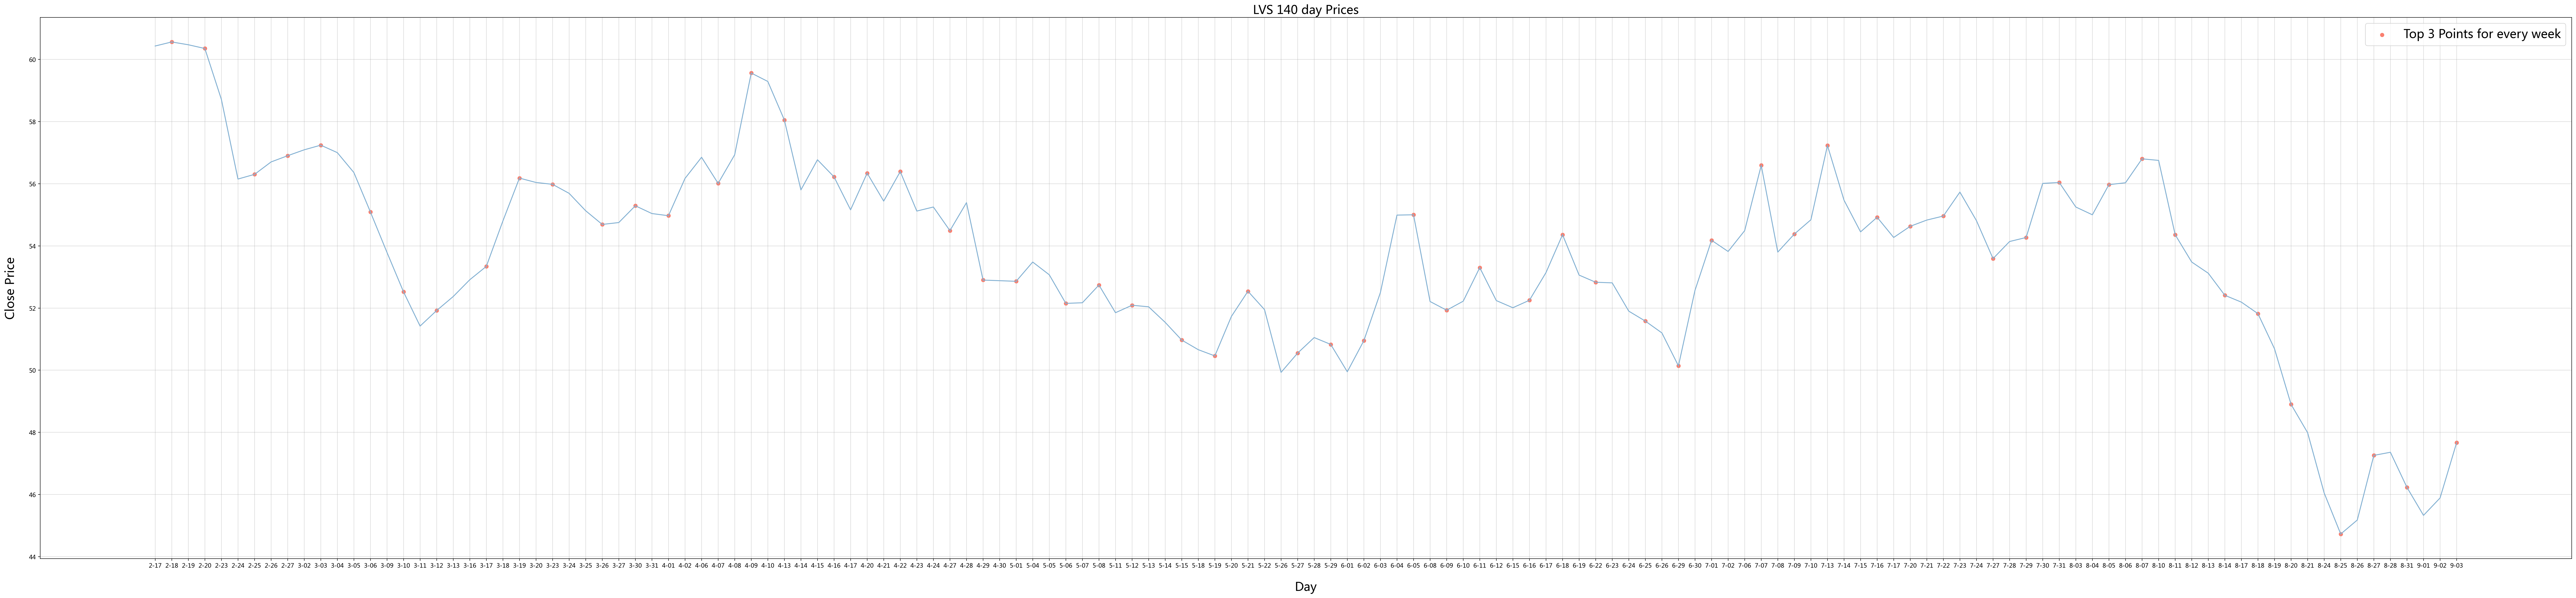

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x, y, z are numpy arrays of shape (140,)
# Creating dummy data for demonstration
x = attention['time'][:140]
for i in range(len(x)):
    x[i] = x[i][-4:]
y = attention['price'][:140]
z = attention['score'][:140]

# Finding the indices for the top three z values in each chunk
top_indices = find_top_three_indices(z)

plt.figure(figsize=(60, 14),dpi=200)
plt.plot(x, y, color = '#82B0D2')
plt.scatter(x[top_indices], y[top_indices], color='#FA7F6F', label='Top 3 Points for every week')
plt.title(f"LVS 140 day Prices",fontsize=20)
plt.xlabel("Day",labelpad=20,fontsize=20)
plt.ylabel("Close Price",labelpad=20,fontsize=20)
plt.legend(fontsize=20)
plt.grid(alpha=.5)
plt.tight_layout()
plt.savefig(f'./output/pic/2023-11-30/1.png',bbox_inches = 'tight',dpi=200)
plt.show()


In [33]:
z

array([0.12784827, 0.21041058, 0.11848955, 0.1542668 , 0.1219774 ,
       0.11094406, 0.15606333, 0.12776971, 0.21057983, 0.1186143 ,
       0.15406318, 0.12203577, 0.11103743, 0.1558998 , 0.1279933 ,
       0.21101294, 0.11848949, 0.15411642, 0.12194492, 0.1107663 ,
       0.15567662, 0.1278151 , 0.21026431, 0.11850661, 0.15434752,
       0.12192477, 0.11105067, 0.15609102, 0.12781978, 0.2105737 ,
       0.11857191, 0.15413192, 0.12195762, 0.11101988, 0.15592517,
       0.12778632, 0.21014298, 0.11836948, 0.15449098, 0.12209776,
       0.11112165, 0.15599084, 0.12785146, 0.21043415, 0.11852444,
       0.15433782, 0.12200832, 0.11102944, 0.15581435, 0.12791313,
       0.21096268, 0.11854228, 0.15403034, 0.12190428, 0.11080391,
       0.15584336, 0.12785736, 0.21071474, 0.11852283, 0.15421839,
       0.12202822, 0.11088932, 0.15576917, 0.12785517, 0.21085647,
       0.11858691, 0.15395331, 0.12214892, 0.11089413, 0.1557051 ,
       0.12797362, 0.21068801, 0.11850455, 0.15417168, 0.12184

## 可视化2

In [9]:
from pyecharts.charts import Line
from pyecharts import options as opts

# 创建一个Line对象
line = Line(init_opts=opts.InitOpts(width='1600px', height='800px'))

# 添加x轴和y轴数据
line.add_xaxis(x.tolist())
line.add_yaxis("Close Price", y.tolist(), is_smooth=True)

# 标记每7个z值中的三个最大值所对应的点
markpoints = []
for i in range(0, len(z), 7):
    chunk = z[i:i+7]
    if len(chunk) >= 3:
        top_three_indices = chunk.argsort()[-3:]
        for idx in top_three_indices:
            markpoints.append(opts.MarkPointItem(coord=[x[i+idx], y[i+idx]], value=z[i+idx]))

# 设置折线图的全局选项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="140 Day Prices"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(type_="value")
)

# 设置系列配置和标记点
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False),
                     markpoint_opts=opts.MarkPointOpts(data=markpoints))

# 将图表渲染为HTML文件
line.render('line_chart_scroll.html')


'E:\\_Project\\Python\\Fingat\\output\\pic\\2023-11-30\\1.html'

In [10]:
from pyecharts.charts import Line
from pyecharts import options as opts
import numpy as np

# 假设 x, y, z 是形状为 (140,) 的 numpy 数组
# 创建示例数据
x = attention['time'][:140]
y = attention['price'][:140]
z = attention['score'][:140]

# 查找每个区块中 z 值最高的三个索引
top_indices = find_top_three_indices(z)

# 创建 Line 对象
line = Line()

# 添加 x 轴和 y 轴数据
line.add_xaxis(x.tolist())
line.add_yaxis("价格", y.tolist(), markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(coord=[x[i], y[i]], value=z[i]) for i in top_indices]))

# 设置图表样式
line.set_global_opts(
    title_opts=opts.TitleOpts(title="140天价格"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(name="收盘价"),
    datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
)

# 导出为HTML
line.render('./output/pic/2023-11-30/1.html')


'E:\\_Project\\Python\\Fingat\\output\\pic\\2023-11-30\\1.html'